# Part 2 - Blending & Pasting Images

**Features:**
- Blend 2 images (same sizes) together using `addWeighted` function.
- Overlay 2 images (different sizes) together.
- Blend 2 images (different sizes) together.

**Theory:**
- Often we will be working with multiple images. OpenCV has many programmatic methods of blending images together and pasting images on top of each other.
- Blending images is done through the **addWeighted** function that uses both images and combines them.
- To blend images we use a simple formula:

$$new_{pixel} = \alpha * pixel_1 + \beta * pixel_2 + \gamma$$

- To blend successfully, both 2 images should have same size

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [14]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

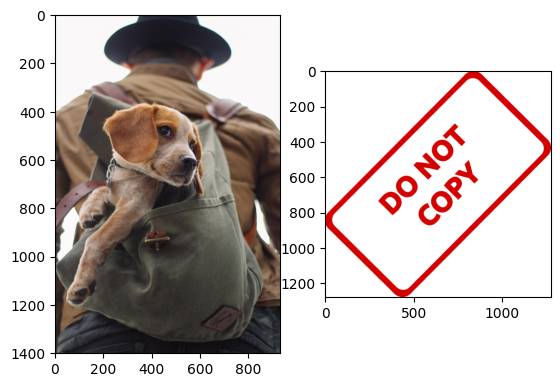

In [5]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

In [6]:
# check the shape of both images
img1.shape, img2.shape

((1401, 934, 3), (1280, 1277, 3))

## Blending images of the same size

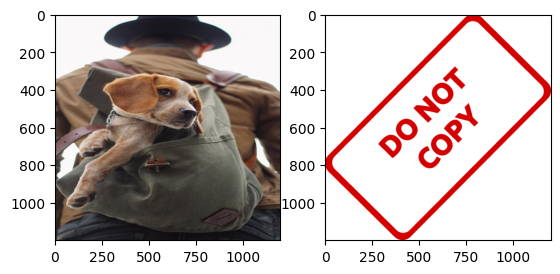

In [8]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

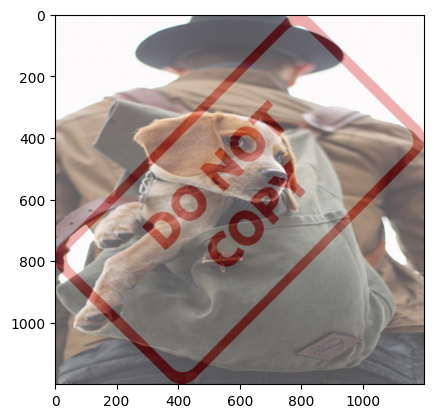

In [10]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)

plt.imshow(blended)
plt.show()

## Blend images of different sized images

In [11]:
# overlay small image on top of a large image (np blending)
# Numpy reassignment

In [15]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [16]:
img2 = cv2.resize(img2, (600, 600))

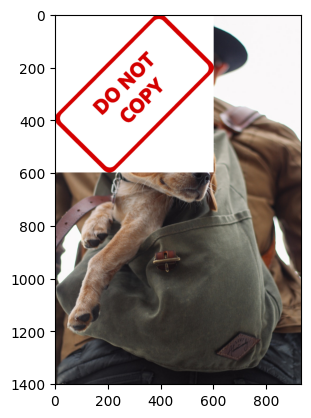

In [17]:
large_img = img1
small_img = img2

# small image position over the large image
x_offset = 0
y_offset = 0

# set bottom right cornet position of the small image over the large image
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

# now overlay time
large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)
plt.show()

## Blend together images of different sizes

**Steps:**
1. Read the 2 images, one small image and one large image.
2. Calculate the ROI (Region of Interest) where the small image will place on top of the large image.
3. Now we need a weighted part, (in our demo, the red part) from our small image. Actually the main purpose is to create a transparent image of the small image.
3. Convert the small image to Gray Scale image.
4. After than, you may need to reverse the image by using **bitwise not** operator. Lets call it mask image.
5. Then create a white background image which is same size with the small image (there should be the 3 channels in this background image).
6. Perform **bitwise or** operation between white image and the mask image to create a transparent background image.
7. Then perform **bitwise or** operation between the actual small color image and the transparent background image. It will help to get the colors of the small image. It will create a foreground image.
8. Now to blend the small image on top of the large image, betform **bitwise or** operation between ROI and the recently created transparent image.
9. And in the final step, replace the blended image to the actual large image ROI.

In [18]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [19]:
img2 = cv2.resize(img2, (600, 600))

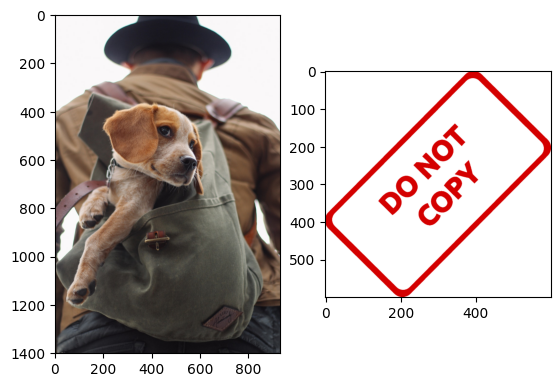

In [20]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

In [22]:
img1.shape, img2.shape

((1401, 934, 3), (600, 600, 3))

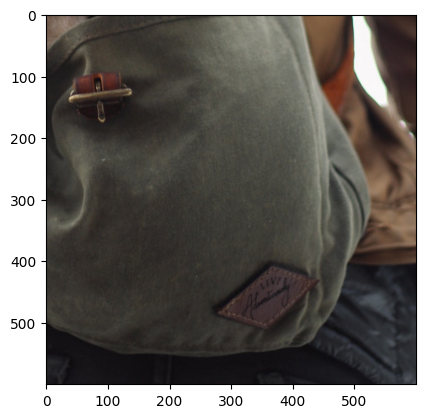

In [23]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

# roi = region of interest
rows, cols, channels = img2.shape
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

plt.imshow(roi)
plt.show()

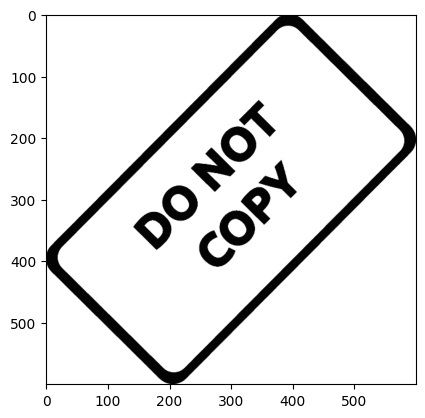

In [24]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.imshow(img2_gray, cmap="gray")
plt.show()

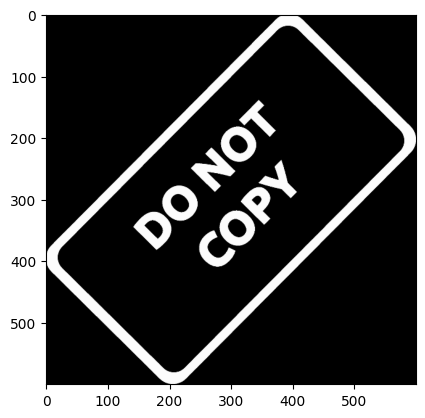

In [25]:
# inverve the color of the second image
mask_inv = cv2.bitwise_not(img2_gray)

plt.imshow(mask_inv, cmap="gray")
plt.show()

In [26]:
# here np.full is alternative of np.zeros
white_background = np.full(img2.shape, 255, dtype=np.uint8)

white_background.shape

(600, 600, 3)

(600, 600, 3)


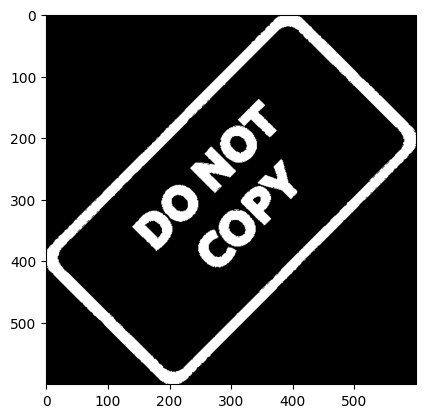

In [27]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

print(bk.shape)

plt.imshow(bk)
plt.show()

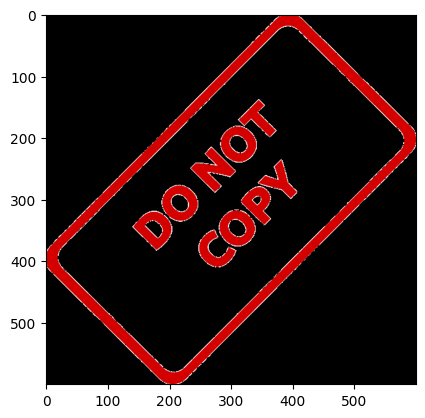

In [28]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

plt.imshow(fg)
plt.show()

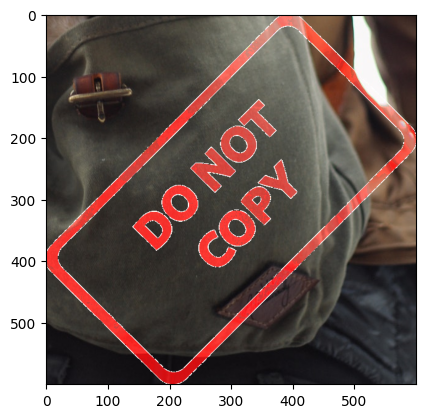

In [29]:
final_roi = cv2.bitwise_or(roi, fg)

plt.imshow(final_roi)
plt.show()

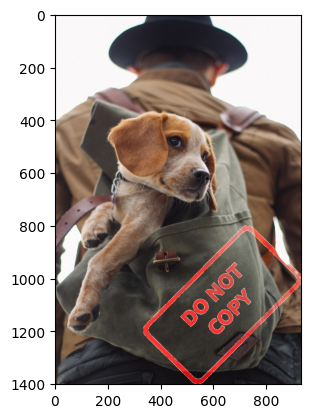

In [30]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)
plt.show()